# ImportLibraries 

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the CSV File into a data frame

In [109]:
df911 = pd.read_csv('911.csv')
df911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Will arrange zipcodes for 911 calls by number of calls list the top and bottom 10

In [110]:
top = df911['zip'].value_counts().head(10)
bottom = df911['zip'].value_counts().tail(10)
print(top)
print(bottom)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64
18036.0    2
36107.0    1
19490.0    1
19127.0    1
19107.0    1
77316.0    1
19457.0    1
19139.0    1
19119.0    1
17752.0    1
Name: zip, dtype: int64


#  Will find out what are the most common unique title codes

In [111]:
df911['title'].value_counts().head(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

# Separate the Reason from the Title and display the most common reasons for emergency visits

In [112]:
df911['Reason'] = df911['title'].apply(lambda splitreason: splitreason.split(':')[0])
df911['Reason'].value_counts()


EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# Plot the Most common reasons for 911 visits 

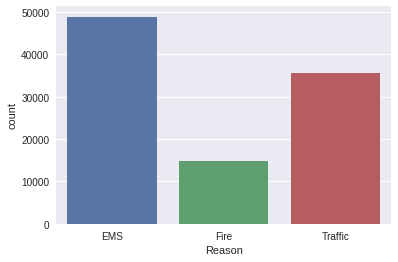

In [113]:
sns.countplot(x = 'Reason', data = df911)

# Convert String Dates to DataTime Objects and make three new columns for hour, month and day of the week

In [114]:
df911['timeStamp'] = pd.to_datetime(df911['timeStamp'])
df911['Hour'] = df911['timeStamp'].apply(lambda time:time.hour)
df911['Month'] = df911['timeStamp'].apply(lambda time:time.month)
df911['Day of Week'] = df911['timeStamp'].apply(lambda time:time.dayofweek)


# Convert Day of the week from numbers into days

In [115]:
dmap = {0:'Mon',1:'Tue', 2:'Wed',3: 'Thu', 4 : 'Fri', 5: 'Sat', 6: 'Sun'}
df911['Day of Week'] = df911['Day of Week'].map(dmap)

# Plot the occurences of reasons against each day of the week 

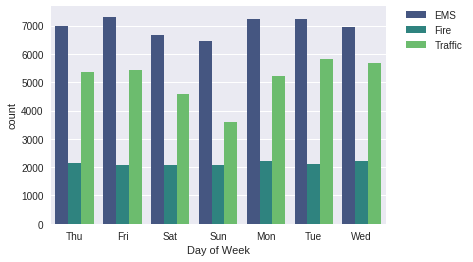

In [118]:
sns.countplot(x = 'Day of Week', data = df911, hue = 'Reason', palette = 'viridis')
plt.legend(bbox_to_anchor =(1.05,1),loc =2, borderaxespad = 0.)
